## Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


print(tf.__version__)

2.16.1


In this notebook, we will try to build neural network model using TensorFlow's Keras API. We first fit the model without Callback and with Callback then we will compare the result.

### MNIST

Data Loading

In [2]:
mnist = tf.keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

MNIST consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a grayscale image of size 28x28 pixels.

Check NaN Value

In [5]:
np.isnan(x_train_full).any()

False

In [6]:
np.isnan(x_test).any()

False

NaN value in a dataset can be a problem and affect the performance of the model. So checking the NaN Values is essential in the preprocessing data. The above output shows that there is no NaN value in the data.

Check the distribution of the data
Countplot is one of ways to see the distribution of classification data. The plot shows that MNIST data exhibits the balance distribution across its classes.

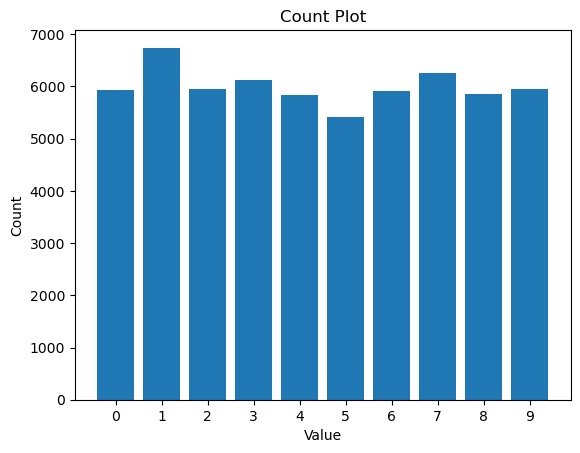

In [7]:
# Get unique values and their counts
unique_values, counts = np.unique(y_train_full, return_counts=True)

# Plot count for each unique value
plt.bar(unique_values, counts)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count Plot')

# Set x-axis tick positions and labels
plt.xticks(unique_values)

# Show the plot
plt.show()

Normalization
Before we put it into the model, we have the data should be scaled. Here, we use simple normalization by dividing the data with 255 so the image scale range will be 0 to 1

In [8]:
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.

Shows some samples from MNIST dataset

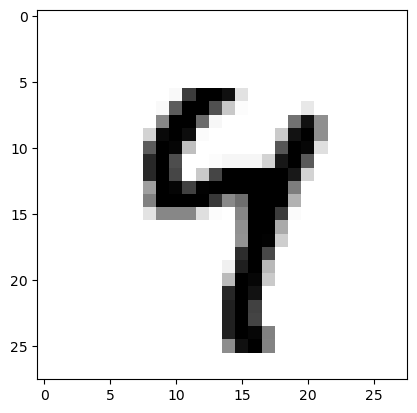

In [9]:
plt.imshow(x_train[2], cmap="binary")
#plt.axis('off')
plt.show()

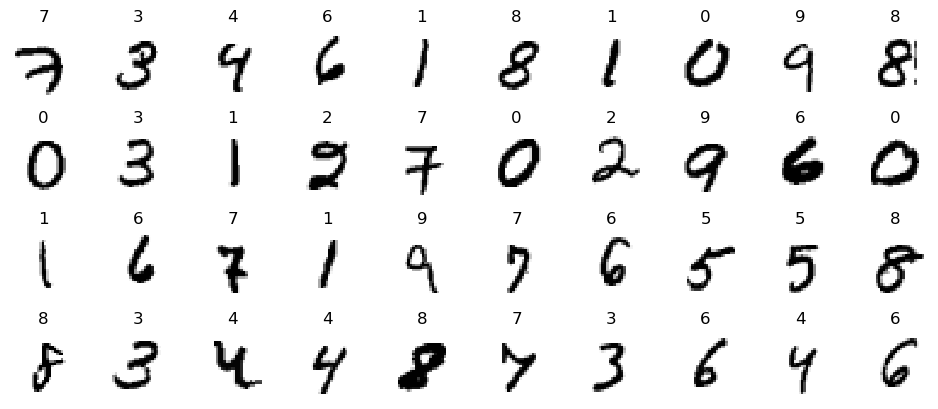

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Tensorflow Model

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

c:\cits5508-2023\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
  16/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1445 - loss: 2.3091     

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7396 - loss: 1.0089 - val_accuracy: 0.9182 - val_loss: 0.3033
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9131 - loss: 0.3068 - val_accuracy: 0.9358 - val_loss: 0.2331
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9304 - loss: 0.2437 - val_accuracy: 0.9452 - val_loss: 0.1967
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9416 - loss: 0.2060 - val_accuracy: 0.9528 - val_loss: 0.1725
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9486 - loss: 0.1787 - val_accuracy: 0.9584 - val_loss: 0.1544
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9549 - loss: 0.1576 - val_accuracy: 0.9616 - val_loss: 0.1406
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9594 - loss: 0.1408 - val_accuracy: 0.9656 - val_loss: 0.1298
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9638 - loss: 0.1271 - val_accurac

In [16]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

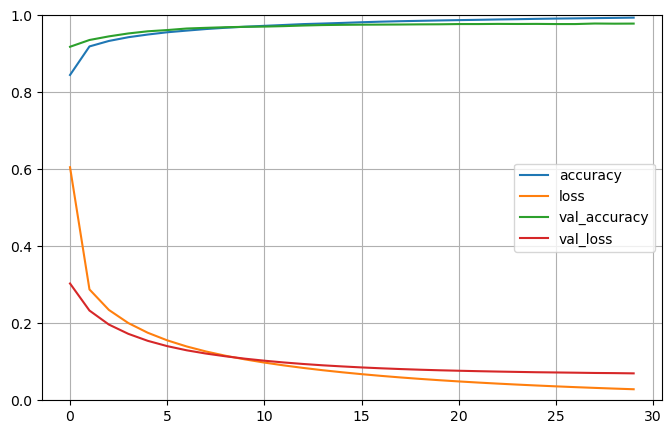

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
model.evaluate(x_test, y_test)

291/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.0854

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.0843


[0.07084480673074722, 0.978600025177002]

As we can see that the training loss and validation loss decrease over the time, conversely, the training and validation accuracy increase as the model had passed all epochs. Now we can save the model by "model.save("the name of model")".

In [20]:
model.save("seq_model1.h5")

#### Using Call back

In [21]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

c:\cits5508-2023\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# resetting weights
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
# Define and configure callbacks
early_cb = keras.callbacks.EarlyStopping(patience=3),
check_cb = keras.callbacks.ModelCheckpoint(filepath='seq_model2.keras', save_best_only=True),

callbacks = [early_cb, check_cb]

history2 = model2.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/30
  73/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2250 - loss: 2.2271 

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7372 - loss: 1.0132 - val_accuracy: 0.9186 - val_loss: 0.3006
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9150 - loss: 0.3032 - val_accuracy: 0.9350 - val_loss: 0.2350
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9321 - loss: 0.2413 - val_accuracy: 0.9452 - val_loss: 0.1998
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9425 - loss: 0.2030 - val_accuracy: 0.9520 - val_loss: 0.1753
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9498 - loss: 0.1749 - val_accuracy: 0.9584 - val_loss: 0.1573
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9563 - loss: 0.1535 - val_accuracy: 0.9620 - val_loss: 0.1432
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9613 - loss: 0.1366 - val_accuracy: 0.9642 - val_loss: 0.1321
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.1230 - val_accurac

EarlyStopping is a callback that stops the training process early if a monitored metric (such as validation loss) stops improving for a specified number of epochs. ModelCheckpoint is a callback that saves the model's weights during training.The save_best_only=True parameter ensures that only the weights of the best-performing model on the validation set are saved.

In [24]:
model2 = keras.models.load_model("seq_model2.keras") # rollback to best model
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9745 - loss: 0.0862


[0.07185661792755127, 0.9781000018119812]

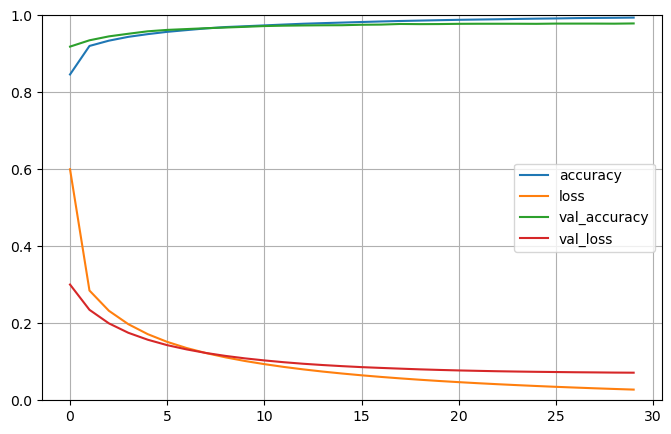

In [25]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### Dropout


Dropout is a regularization technique commonly used in neural networks to prevent overfitting. Between the dense layers, we add dropout layers with a dropout rate of 20% (0.2)

In [26]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

c:\cits5508-2023\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# resetting weights
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
# Define and configure callbacks
early_cb = keras.callbacks.EarlyStopping(patience=3),
check_cb = keras.callbacks.ModelCheckpoint(filepath='seq_model3.keras', save_best_only=True),

callbacks = [early_cb, check_cb]

history3 = model3.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/30


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5870 - loss: 1.2883 - val_accuracy: 0.9052 - val_loss: 0.3352
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8615 - loss: 0.4646 - val_accuracy: 0.9254 - val_loss: 0.2565
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8870 - loss: 0.3741 - val_accuracy: 0.9374 - val_loss: 0.2137
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9035 - loss: 0.3269 - val_accuracy: 0.9470 - val_loss: 0.1853
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9140 - loss: 0.2885 - val_accuracy: 0.9538 - val_loss: 0.1634
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9234 - loss: 0.2557 - val_accuracy: 0.9568 - val_loss: 0.1496
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9282 - loss: 0.2378 - val_accuracy: 0.9622 - val_loss: 0.1374
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9356 - loss: 0.2164 - val_accurac

In [29]:
model3 = keras.models.load_model("seq_model3.keras") # rollback to best model
model3.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0789


[0.0659458190202713, 0.9786999821662903]

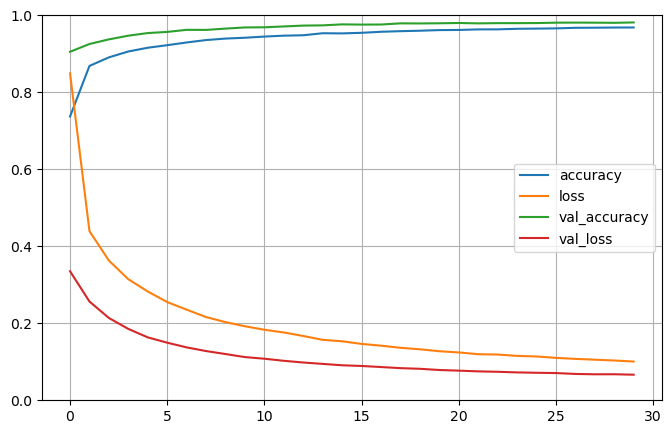

In [30]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Model with dropout and callbacks for checkpointing and early stopping achieves good accuracy from the beginning of training, it suggests that the model is effectively leveraging dropout regularization and benefiting from the optimization provided by the callbacks